In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dfi = pd.read_csv("fct_invoice.csv") 
dfc = pd.read_json("dim_customer.json") 

print(dfi)
print(dfc)

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [4]:
#EASY

In [6]:
#Easy 1: How many unique customers are in the dataset?
dfi['customer_id'].nunique()

5191

In [9]:
#Easy 2: What are the different categories of products available? How many unique categories are there?
cat = dfi['category'].unique()
num_cat = len(cat)
print("categories:", cat)
print("# of unique categories:", num_cat)

categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
# of unique categories: 8


In [13]:
#Easy 3: Which payment method is the most popular? How many times was it used?
payment = dfi['payment_method'].value_counts().idxmax()
count = dfi['payment_method'].value_counts().max()
print("method:",payment)
print("times:", count)

method: Cash
times: 44447


In [14]:
#MEDIUM

In [21]:
#Medium 1: What are the three most popular categories, by total sales?
dfi["total_sales"] = dfi["quantity"] * dfi["price"]
top = dfi.groupby("category")["total_sales"].sum().sort_values(ascending=False).head(3).index.tolist()
print("top 3:", top)

top 3: ['Clothing', 'Shoes', 'Technology']


In [31]:
#for Medium 2
print(dfi.columns)
print(dfc.columns)

Index(['invoice_no', 'customer_id', 'category', 'quantity', 'price',
       'payment_method', 'invoice_date', 'shopping_mall', 'total_sales'],
      dtype='object')
Index(['age', 'first_name', 'gender', 'id', 'last_name'], dtype='object')


In [95]:
#Medium 2: What are the total sales attributed to customers over the age of 45?
dfc = dfc.rename(columns={"id": "customer_id"})
merge = pd.merge(dfi, dfc, on="customer_id", how="inner")
merge = merge.fillna(0)
merge['total_sales'] = merge['quantity'] * merge['price']
over_45 = merge[merge["age"] > 45]["total_sales"].sum()
print("total for over 45:",over_45)

total for over 45: 82039768.15


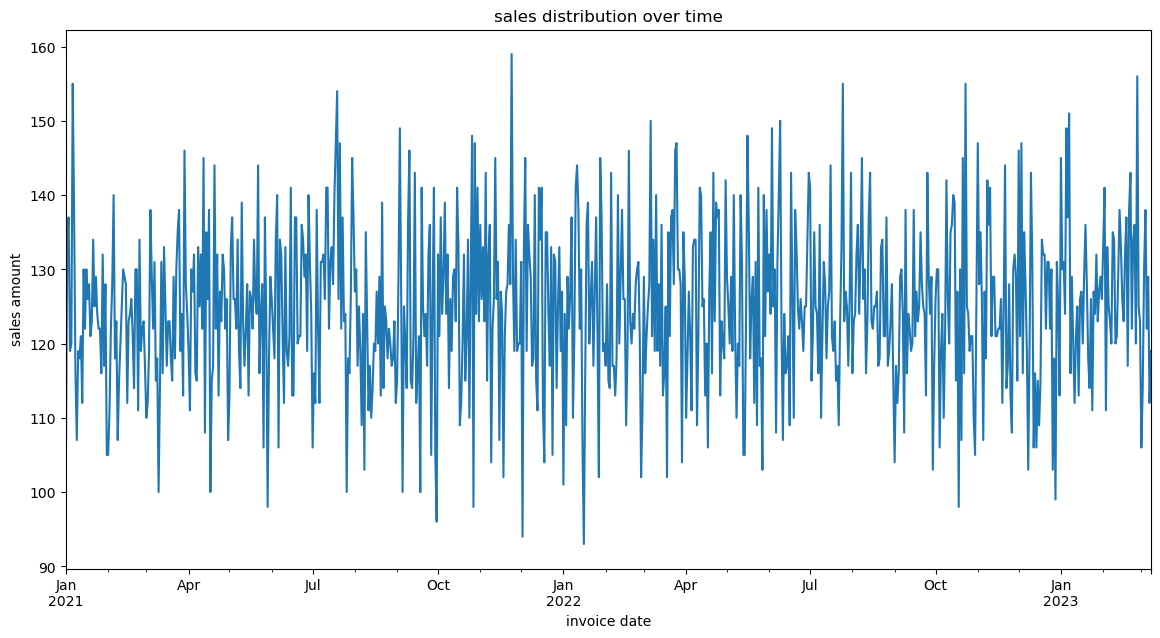

In [89]:
#Medium 3: How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
dfi['invoice_date'] = pd.to_datetime(dfi['invoice_date'], dayfirst=True)
dfi['year_month'] = dfi['invoice_date'].dt.to_period('M')
sales =dfi.groupby('invoice_date').size()

plt.figure(figsize=(14, 7))
sales.plot(),
plt.title("sales distribution over time")
plt.xlabel('invoice date')
plt.ylabel('sales amount')
plt.show()

In [36]:
#HARD

In [ ]:
#Hard 1: Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).
age_start = (merge["age"] // 10) * 10
age_end = age_start + 9
merge["age_grp"] = age_start.astype(int).astype(str) + "-" + age_end.astype(int).astype(str)

pivot = pd.pivot_table(merge, index=["category", "age_grp"], values="total_sales", aggfunc="sum").reset_index()

pd.set_option("display.max_rows", None)
display(pivot)

           category age_grp   total_sales
0             Books   10-19     12,801.75
1             Books   20-29     79,461.75
2             Books   30-39     84,143.10
3             Books   40-49     87,203.40
4             Books   50-59     74,962.20
5             Books   60-69     80,476.80
6             Books   70-79     54,827.85
7             Books   80-89     26,664.00
8          Clothing   10-19  1,927,413.84
9          Clothing   20-29 10,250,732.80
10         Clothing   30-39 11,354,126.96
11         Clothing   40-49 11,215,189.92
12         Clothing   50-59 10,321,851.76
13         Clothing   60-69 10,660,642.08
14         Clothing   70-79  7,769,371.28
15         Clothing   80-89  4,493,698.00
16        Cosmetics   10-19    109,619.36
17        Cosmetics   20-29    605,915.32
18        Cosmetics   30-39    723,544.70
19        Cosmetics   40-49    665,034.96
20        Cosmetics   50-59    587,780.96
21        Cosmetics   60-69    649,990.76
22        Cosmetics   70-79    419